# Trip Duration Analysis

This notebook compiles various Python scripts for a comprehensive analysis of trip duration of a bike-sharing system. 
Each section focuses on a specific aspect of the data, such as age, bike type, time patterns, and user demographics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'past_data2.csv'
data = pd.read_csv(file_path)
data

,Unnamed: 0,tripduration,starttime,stoptime,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,endstationlongitude,bikeid,usertype,birthyear,gender
0,0,131,2018-05-01 07:29:57.549,2018-05-01 07:32:08.616,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29617,Subscriber,1966.0,1
1,1,73,2018-05-01 08:13:58.256,2018-05-01 08:15:11.923,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,29288,Subscriber,1975.0,1
2,2,4929,2018-05-01 08:17:21.311,2018-05-01 09:39:31.077,3183,Exchange Place,40.716247,-74.033459,3183,Exchange Place,40.716247,-74.033459,29520,Customer,1969.0,0
3,3,432,2018-05-01 08:25:58.715,2018-05-01 08:33:10.896,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29595,Subscriber,1973.0,1
4,4,432,2018-05-01 08:28:09.916,2018-05-01 08:35:22.144,3183,Exchange Place,40.716247,-74.033459,3638,Washington St,40.724294,-74.035483,33623,Subscriber,1959.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301346,1301346,621,2019-09-30 23:11:40.063,2019-09-30 23:22:01.837,3194,McGinley Square,40.725340,-74.067622,3191,Union St,40.718211,-74.083639,26245,Subscriber,1962.0,1
1301347,1301347,167,2019-09-30 23:19:02.938,2019-09-30 23:21:50.829,3211,Newark Ave,40.721525,-74.046305,3209,Brunswick St,40.724176,-74.050656,29525,Subscriber,1984.0,1
1301348,1301348,94,2019-09-30 23:26:24.747,2019-09-30 23:27:59.231,3213,Van Vorst Park,40.718489,-74.047727,3483,Montgomery St,40.719420,-74.050990,26317,Subscriber,1958.0,1
1301349,1301349,366,2019-09-30 23:49:00.426,2019-09-30 23:55:06.962,3638,Washington St,40.724294,-74.035483,3270,Jersey & 6th St,40.725289,-74.045572,29488,Subscriber,1976.0,1


## Hour of Day

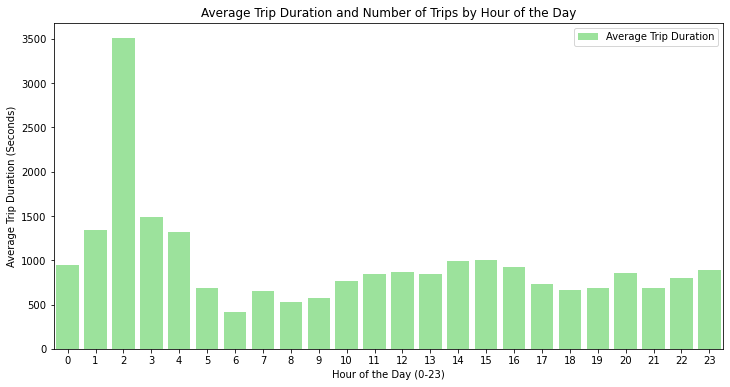

In [2]:
data['starttime'] = pd.to_datetime(data['starttime'])
data['start_hour'] = data['starttime'].dt.hour

# Calculating the average trip duration for each hour of the day
avg_duration_by_hour = data.groupby('start_hour')['tripduration'].mean()
num_trips_by_hour = data.groupby('start_hour').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_by_hour.index, y=avg_duration_by_hour.values, color="lightgreen", label='Average Trip Duration')

plt.title('Average Trip Duration and Number of Trips by Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Average Trip Duration (Seconds)')
plt.legend(loc='upper right')
plt.show()


## Dayofweek

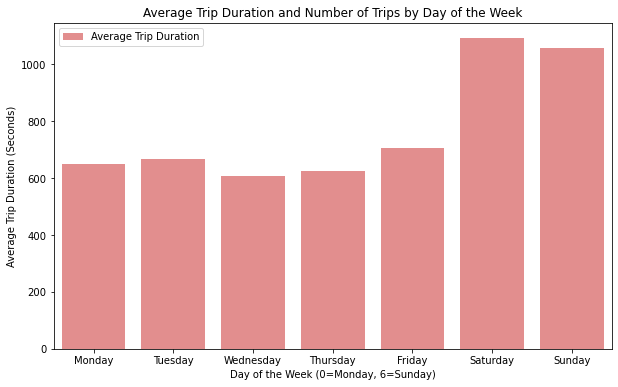

In [3]:
data['start_day_of_week'] = data['starttime'].dt.dayofweek

# Calculating the average trip duration and number of trips for each day of the week
avg_duration_by_day = data.groupby('start_day_of_week')['tripduration'].mean()
num_trips_by_day = data.groupby('start_day_of_week').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_duration_by_day.index, y=avg_duration_by_day.values, color="lightcoral", label='Average Trip Duration')

plt.title('Average Trip Duration and Number of Trips by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Trip Duration (Seconds)')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(loc='upper left')
plt.show()

## Month of Year

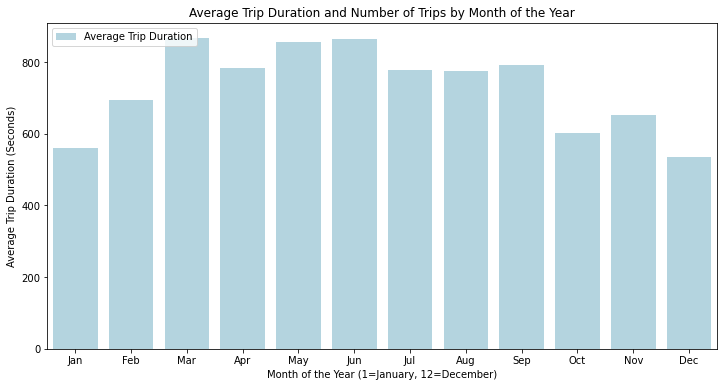

In [4]:
data['start_month'] = data['starttime'].dt.month

# Calculating the average trip duration and number of trips for each month of the year
avg_duration_by_month = data.groupby('start_month')['tripduration'].mean()
num_trips_by_month = data.groupby('start_month').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_by_month.index, y=avg_duration_by_month.values, color="lightblue", label='Average Trip Duration')

plt.title('Average Trip Duration and Number of Trips by Month of the Year')
plt.xlabel('Month of the Year (1=January, 12=December)')
plt.ylabel('Average Trip Duration (Seconds)')

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper left')

plt.show()

## Yearly

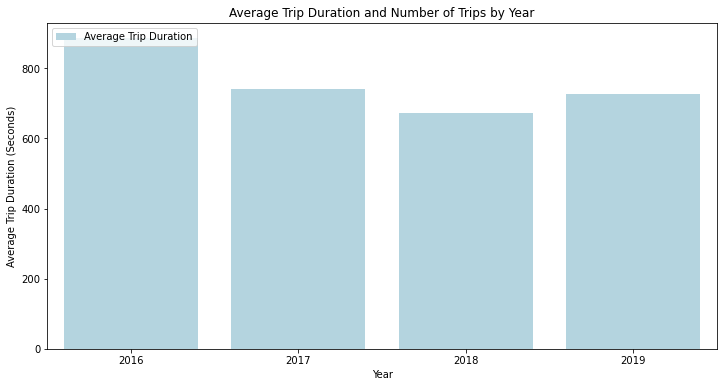

In [5]:
# Convert starttime to datetime and extract year
data['starttime'] = pd.to_datetime(data['starttime'])
data['start_year'] = data['starttime'].dt.year

# Calculating the average trip duration and number of trips for each month
avg_duration_by_year = data.groupby('start_year')['tripduration'].mean()
num_trips_by_year = data.groupby('start_year').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_duration_by_year.index, y=avg_duration_by_year.values, color="lightblue", label='Average Trip Duration')

plt.title('Average Trip Duration and Number of Trips by Year')
plt.xlabel('Year')
plt.ylabel('Average Trip Duration (Seconds)')

plt.xticks(ticks=range(4), labels=['2016', '2017', '2018', '2019'])
plt.legend(loc='upper left')

plt.show()

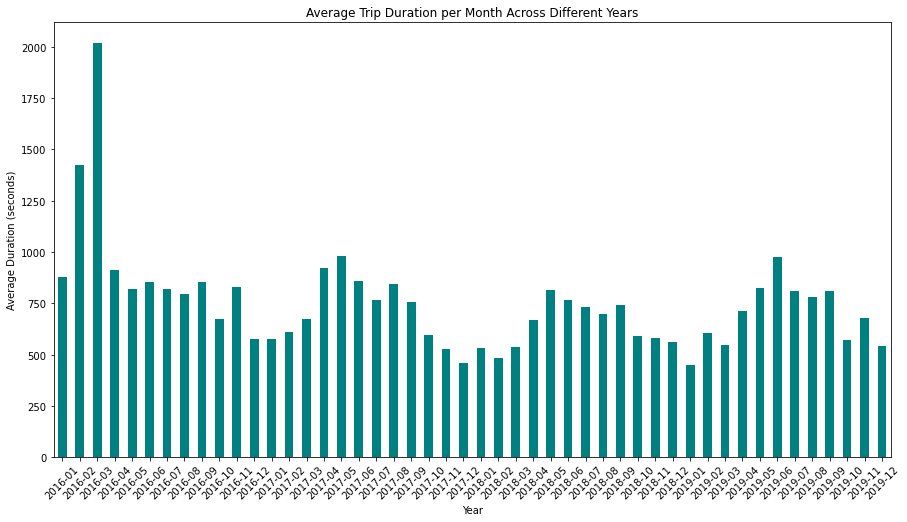

In [6]:
# Extract month from the 'starttime'
data['month'] = data['starttime'].dt.month
data['start_year_month'] = data['starttime'].dt.to_period('M')
# Group by month and calculate average duration
average_durations = data.groupby('start_year_month')['tripduration'].mean()
plt.figure(figsize=(15, 8))
average_durations.plot(kind='bar', color='teal')

plt.title('Average Trip Duration per Month Across Different Years')
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.xticks(rotation=45)
plt.show()

## Bike ID

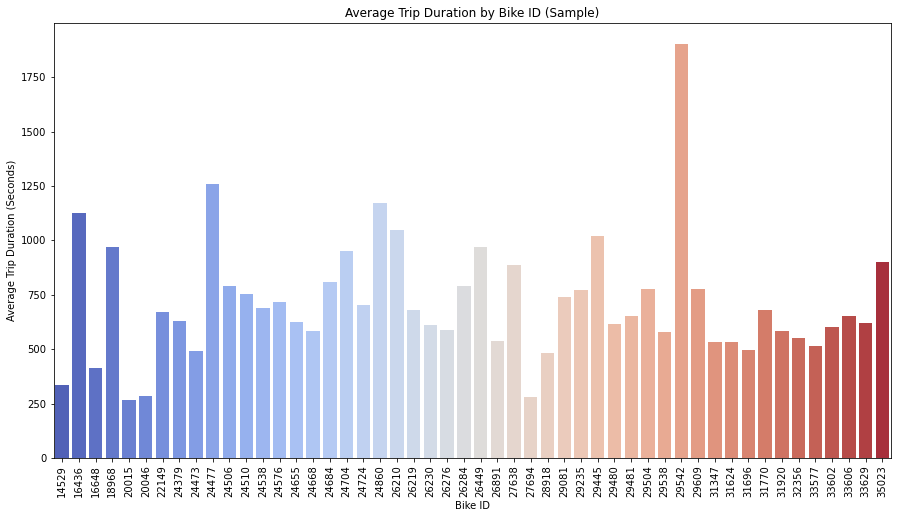

In [7]:
# Calculating the average trip duration for each bike ID
avg_duration_by_bikeid = data.groupby('bikeid')['tripduration'].mean().sort_values()

# Sampling a subset because of potentially large number of unique bikes
sample_avg_duration_by_bikeid = avg_duration_by_bikeid.sample(n=50)

# Plotting a bar graph for the average trip duration per bike ID (sample)
plt.figure(figsize=(15, 8))
sns.barplot(x=sample_avg_duration_by_bikeid.index, y=sample_avg_duration_by_bikeid.values, palette="coolwarm")
plt.title('Average Trip Duration by Bike ID (Sample)')
plt.xlabel('Bike ID')
plt.ylabel('Average Trip Duration (Seconds)')
plt.xticks(rotation=90)
plt.show()


## Birth Year

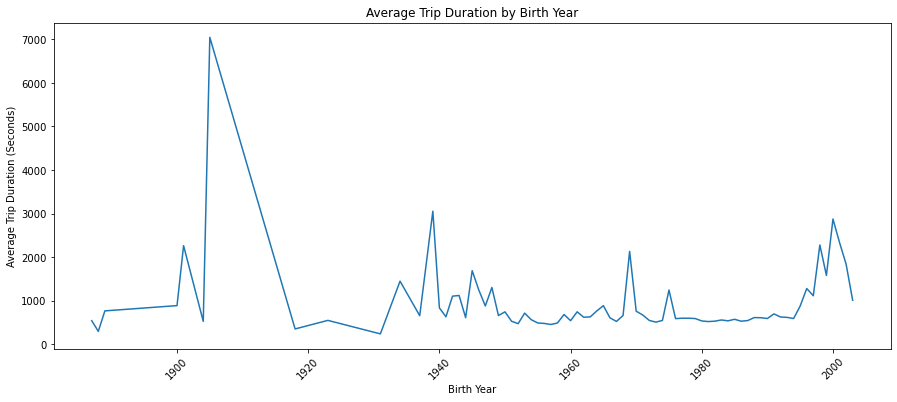

In [8]:
# Calculating the average trip duration for each birth year
avg_duration_by_birthyear = data.groupby('birthyear')['tripduration'].mean()

# Plotting a line graph for the average trip duration per birth year
plt.figure(figsize=(15, 6))
sns.lineplot(x=avg_duration_by_birthyear.index, y=avg_duration_by_birthyear.values)
plt.title('Average Trip Duration by Birth Year')
plt.xlabel('Birth Year')
plt.ylabel('Average Trip Duration (Seconds)')
plt.xticks(rotation=45)
plt.show()


## Start/End Station ID

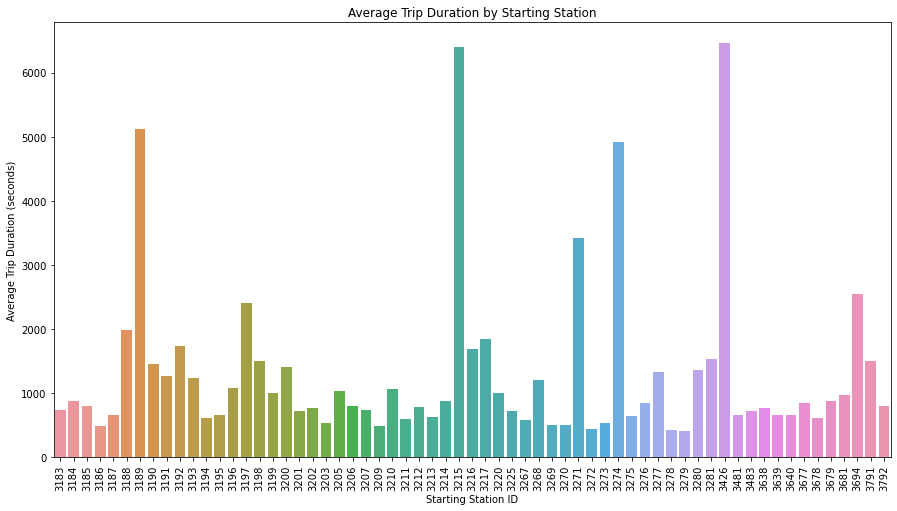

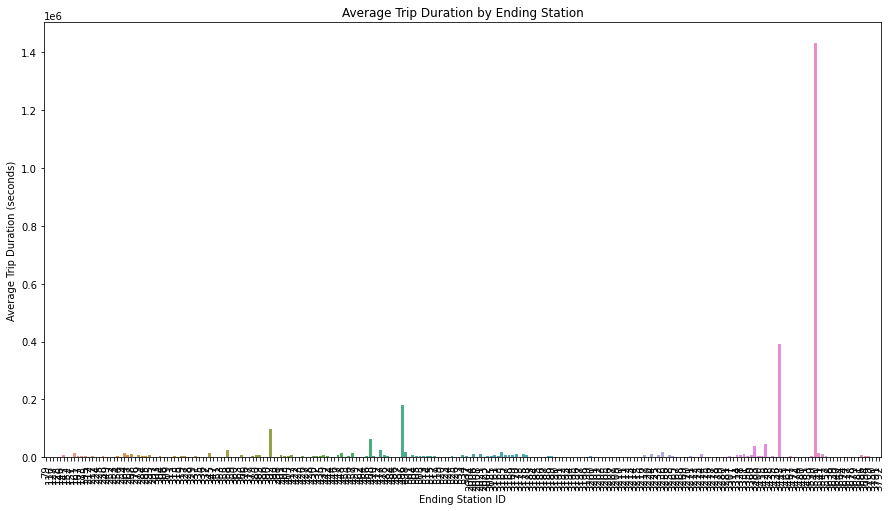

In [9]:
# Calculating the average trip duration for each starting and ending station
avg_duration_by_station_start = data.groupby('startstationid')['tripduration'].mean().reset_index()
avg_duration_by_station_end = data.groupby('endstationid')['tripduration'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='startstationid', y='tripduration', data=avg_duration_by_station_start)
plt.title('Average Trip Duration by Starting Station')
plt.xlabel('Starting Station ID')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='endstationid', y='tripduration', data=avg_duration_by_station_end)

plt.title('Average Trip Duration by Ending Station')
plt.xlabel('Ending Station ID')
plt.ylabel('Average Trip Duration (seconds)')
plt.xticks(rotation=90)
plt.show()

## Gender

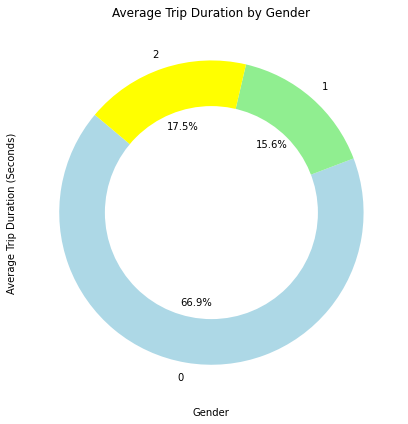

In [10]:
avg_duration_by_gender = data.groupby('gender')['tripduration'].mean()

plt.figure(figsize=(8, 6))

plt.pie(avg_duration_by_gender, labels=avg_duration_by_gender.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'yellow'])

centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Average Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration (Seconds)')
plt.tight_layout()
plt.show()



## User Type

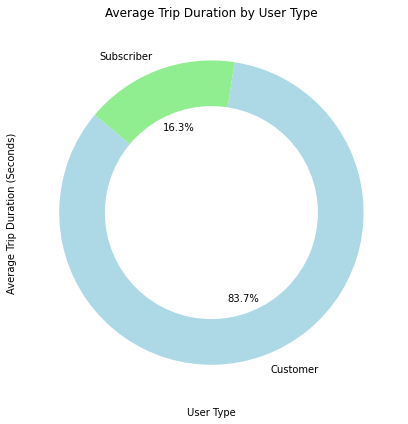

In [11]:
# Calculating the average trip duration for each user type
avg_duration_by_usertype = data.groupby('usertype')['tripduration'].mean()

plt.figure(figsize=(8, 6))

plt.pie(avg_duration_by_usertype, labels=avg_duration_by_usertype.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'])

centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Average Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Average Trip Duration (Seconds)')
plt.tight_layout()
plt.show()

## Start End Hour

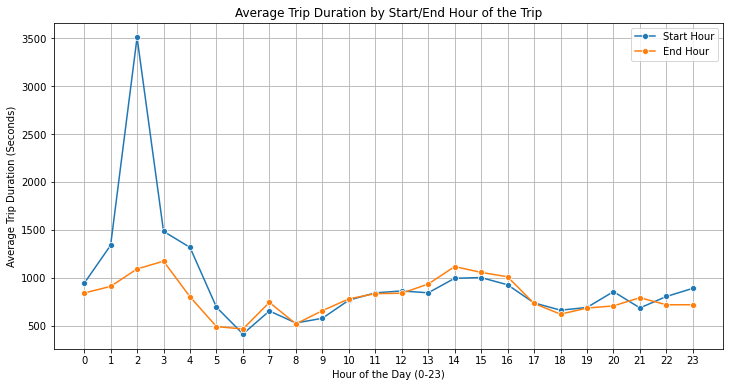

In [12]:
data['stoptime'] = pd.to_datetime(data['stoptime'])
data['end_hour'] = data['stoptime'].dt.hour

# Calculating the average trip duration for each start hour
avg_duration_by_starthour = data.groupby('start_hour')['tripduration'].mean()
avg_duration_by_endhour = data.groupby('end_hour')['tripduration'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_duration_by_starthour.index, y=avg_duration_by_starthour.values, legend='brief', label='Start Hour', marker='o')
sns.lineplot(x=avg_duration_by_endhour.index, y=avg_duration_by_endhour.values, legend='brief', label='End Hour', marker='o')
plt.title('Average Trip Duration by Start/End Hour of the Trip')

plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Average Trip Duration (Seconds)')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()
